In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


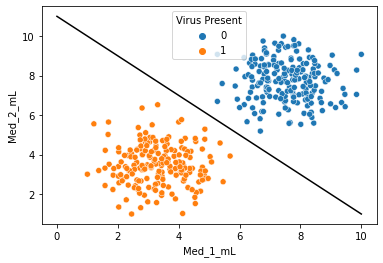

In [10]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue = 'Virus Present', data=df)
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, 'black')
plt.show()

In [11]:
from sklearn.svm import SVC

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [13]:
y = df['Virus Present']

In [14]:
X = df.drop('Virus Present', axis = 1)

In [15]:
model = SVC(kernel='linear', C = 1000)

In [16]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [18]:
from svm_margin_plot import plot_svm_boundary

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


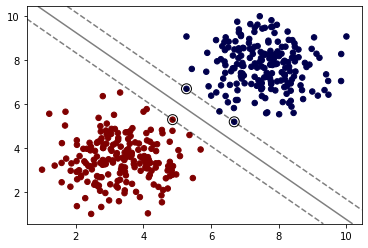

In [20]:
plot_svm_boundary(model, X, y)
plt.show()

In [25]:
model = SVC(kernel = 'linear', C = 0.005)

In [26]:
model.fit(X,y)

SVC(C=0.005, kernel='linear')

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


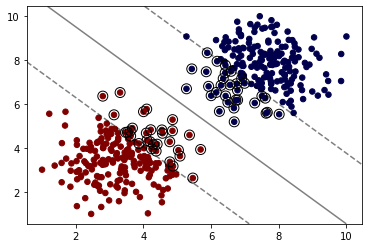

In [27]:
plot_svm_boundary(model, X, y)

In [56]:
rbf_model = SVC(kernel = 'rbf', C = 1, gamma='scale')
rbf_model.fit(X, y)

SVC(C=1)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


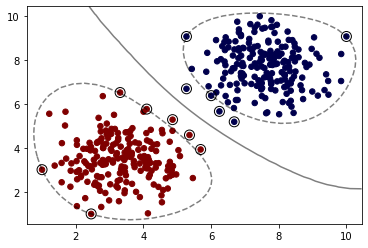

In [57]:
plot_svm_boundary(rbf_model, X, y)

In [68]:
poly_model = SVC(kernel = 'poly', degree = 6,C = 0.05)
poly_model.fit(X, y)

SVC(C=0.05, degree=6, kernel='poly')

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


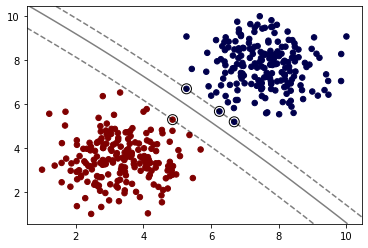

In [69]:
plot_svm_boundary(poly_model, X, y)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


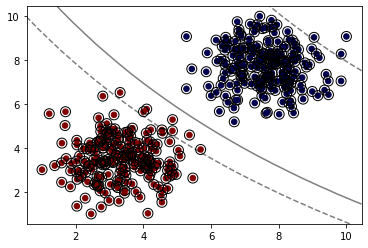

In [59]:
sig_model = SVC(kernel='sigmoid')
sig_model.fit(X, y)
plot_svm_boundary(sig_model, X, y)

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel':['linear', 'rbf']}

In [73]:
grid = GridSearchCV(svm, param_grid)

In [74]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [75]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}